In [1]:
import numpy as np
import pandas as pd

import torch

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [3]:
matplotlib.rc('font', size=22)

In [4]:
import sys

In [5]:
from copy import deepcopy

In [6]:
sys.path.append('../')
sys.path.append('../../')

In [7]:
train_target = pd.read_csv('../data/gender_train.csv')
train_target['customer_id'] = train_target['customer_id'].astype(str)
train_target.head(5)

,customer_id,gender
0,10928546,1
1,69348468,1
2,61009479,0
3,74045822,0
4,27979606,1


In [8]:
df_vectors = pd.read_pickle('../data/mles_embeddings.pickle').set_index('customer_id')
embedding_columns = df_vectors.columns.tolist()
df_vectors = pd.merge(df_vectors, train_target.set_index('customer_id'), left_index=True, right_index=True)
df_vectors.head()

,v000,v001,v002,v003,v004,v005,v006,v007,v008,v009,...,v247,v248,v249,v250,v251,v252,v253,v254,v255,gender
customer_id,,,,,,,,,,,,,,,,,,,,,
10058778,0.008592,0.054177,0.091140,0.050662,-0.005002,0.063958,0.073321,0.013918,0.009047,-0.107932,...,-0.065691,0.054534,-0.074354,0.100621,-0.107426,0.000113,0.027608,-0.127514,-0.063987,1
10230827,0.007318,-0.101771,0.102173,-0.026714,0.018572,0.027085,0.047189,-0.066064,0.041928,-0.001647,...,-0.003251,-0.013531,-0.031526,0.058215,-0.105895,0.021783,-0.105044,-0.120332,0.012252,0
11681378,0.023851,0.023752,0.118703,-0.018299,-0.003815,0.059939,0.088735,0.025737,-0.029722,0.001462,...,-0.076767,-0.001886,-0.047604,0.115920,-0.116904,0.004777,-0.032240,-0.119406,-0.028574,1
14123285,0.074096,-0.061999,0.121144,-0.015382,0.054893,0.062592,-0.015002,-0.062545,0.029373,-0.026800,...,-0.051157,-0.060736,-0.040640,0.092238,-0.118877,0.020998,0.028074,-0.123609,-0.055318,0
16536678,0.017326,0.054621,0.075876,0.037484,-0.008368,0.043872,0.080379,0.027397,-0.003566,0.010729,...,-0.021235,0.093096,-0.063276,0.128461,-0.043213,-0.065389,0.003437,-0.133346,-0.007765,0


In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [10]:
df_pca = df_vectors.copy()

In [11]:
pca = PCA(n_components=32)
pca.fit(df_pca[embedding_columns].values)
np.sum(pca.explained_variance_ratio_)

0.70885885

In [12]:
pca_results = pca.transform(df_pca[embedding_columns].values)
df_pca['_pca_x'] = pca_results[:, 0]
df_pca['_pca_y'] = pca_results[:, 1]


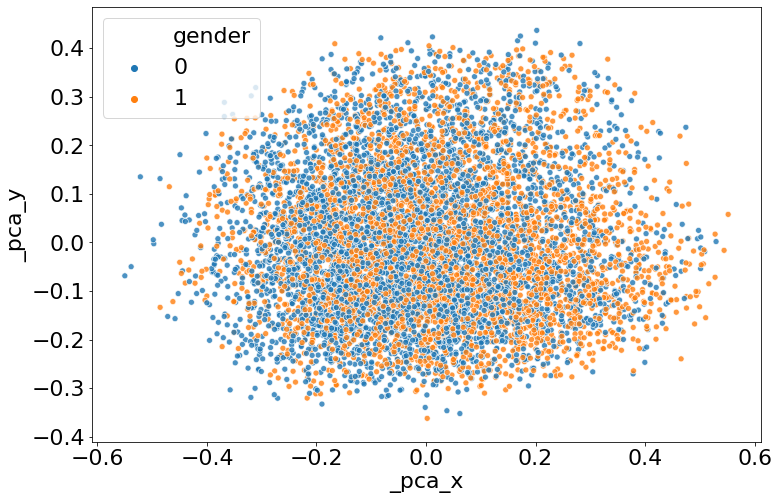

In [13]:
_, axs = plt.subplots(1, 1, figsize=(12, 8))
sns.scatterplot(
    x='_pca_x', y='_pca_y',
    hue='gender',
    # style='bins',
    data=df_pca,
    palette='tab10',
    alpha=0.8,
    ax=axs
)
plt.show()

In [14]:
if len(df_pca) > 40000:
    df_tsne = df_pca.sample(n=40000).copy()
else:
    df_tsne = df_pca.copy()

In [15]:
tsne = TSNE(n_components=2, verbose=1, n_iter=300, metric='cosine')
tsne_results = tsne.fit_transform(df_tsne[embedding_columns].values)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8400 samples in 0.002s...
[t-SNE] Computed neighbors for 8400 samples in 1.246s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8400
[t-SNE] Computed conditional probabilities for sample 2000 / 8400
[t-SNE] Computed conditional probabilities for sample 3000 / 8400
[t-SNE] Computed conditional probabilities for sample 4000 / 8400
[t-SNE] Computed conditional probabilities for sample 5000 / 8400
[t-SNE] Computed conditional probabilities for sample 6000 / 8400
[t-SNE] Computed conditional probabilities for sample 7000 / 8400
[t-SNE] Computed conditional probabilities for sample 8000 / 8400
[t-SNE] Computed conditional probabilities for sample 8400 / 8400
[t-SNE] Mean sigma: 0.122657
[t-SNE] KL divergence after 50 iterations with early exaggeration: 95.871254
[t-SNE] KL divergence after 300 iterations: 3.335651


In [16]:
df_tsne['tSNE[0]'] = tsne_results[:, 0]
df_tsne['tSNE[1]'] = tsne_results[:, 1]

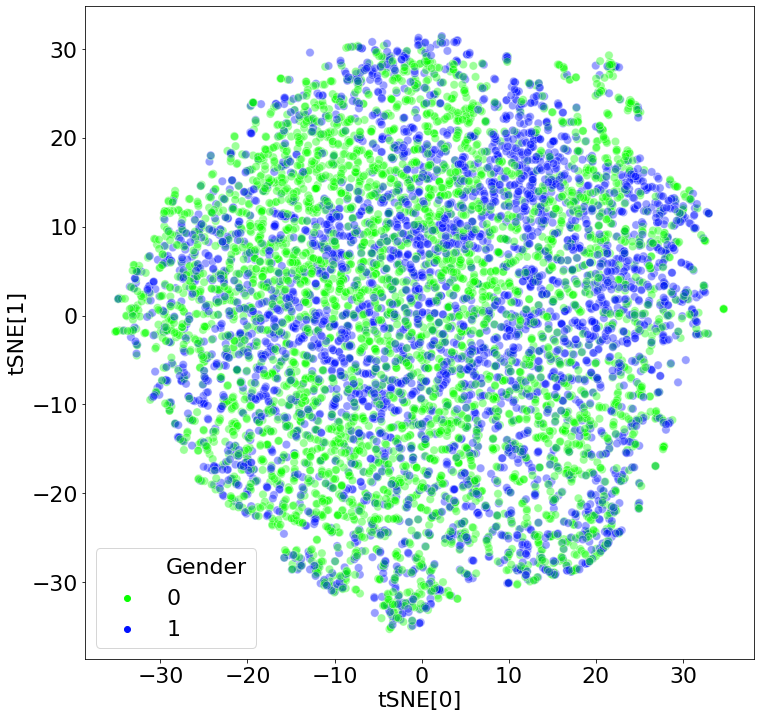

In [17]:
_, axs = plt.subplots(1, 1, figsize=(12, 12))
sns.scatterplot(
    x='tSNE[0]', y='tSNE[1]',
    hue='Gender',
    data=df_tsne.rename(columns={'gender': 'Gender'}),
    palette='hsv',
    alpha=0.4, s=70,
    ax=axs,
)
# plt.show()

plt.savefig('gender-tsne.pdf')